To start, here's several helpful packages to load

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # statistical data visualization

In [4]:
#User ratings
ratings_file = './datasets/users_based/ratings.csv'
df_ratings = pd.read_csv(ratings_file)

#Movies
movies_file = './datasets/users_based/movies.csv'
df_movies = pd.read_csv(movies_file)

We need a dataset that contains the userId, movie title and its ratings.

In [5]:
movie_data = pd.merge(df_ratings, df_movies, on='movieId')

Now we group the dataset by the title of the movie and then calculate the mean of the rating for each movie


In [6]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Ghost in the Shell: Stand Alone Complex - The Laughing Man (2005)    5.0
Speedy (1928)                                                        5.0
Cold Fever (Ã kÃ¶ldum klaka) (1995)                                 5.0
Symbol (Shinboru) (2009)                                             5.0
Limelight (1952)                                                     5.0
Name: rating, dtype: float64

Let's sort the ratings in the descending order of their average ratings

In [7]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

 A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

In [8]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

We will create a new dataframe called ratings_mean_count and first add the average rating of each movie to this dataframe and we will add the number of ratings for a movie to the ratings_mean_count dataframe as follows

In [9]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())


To understand better the data, let's plot a histogram for the number of ratings represented by the rating_counts column in the above dataframe.

<Axes: >

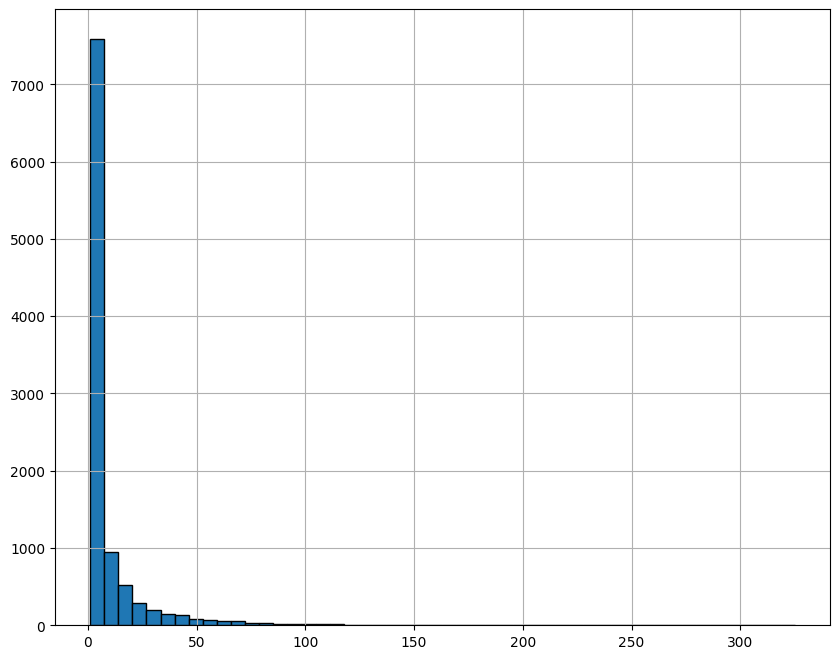

In [10]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

From the above plot, we can see that most of the movies have received less than 50 ratings and there are no movies having more than 100 ratings.
What about the average ratings?

<Axes: >

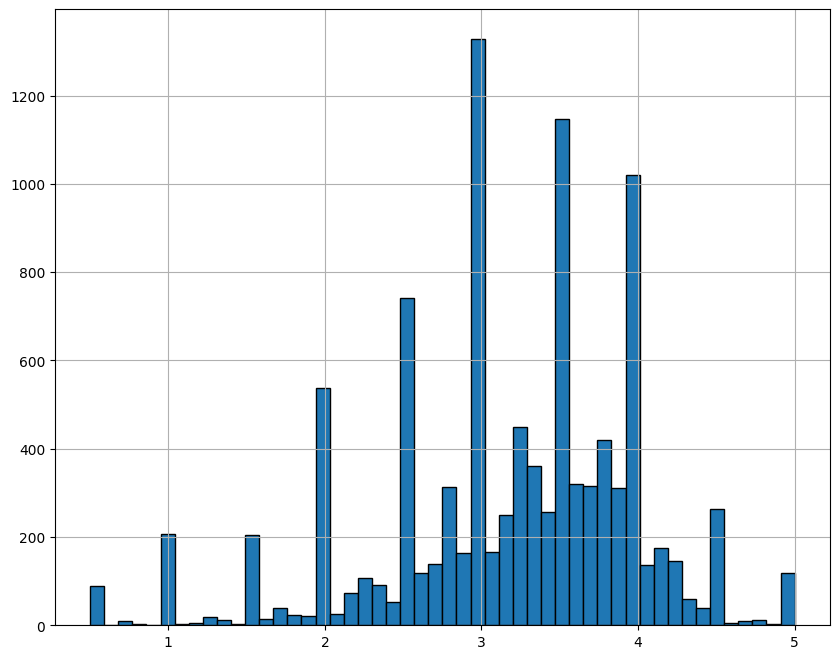

In [11]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

The data shows a weak normal distribution with the mean of around 3.5. There are a few outliers in the data as well.
Movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating.
Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings.

<Figure size 1000x800 with 0 Axes>

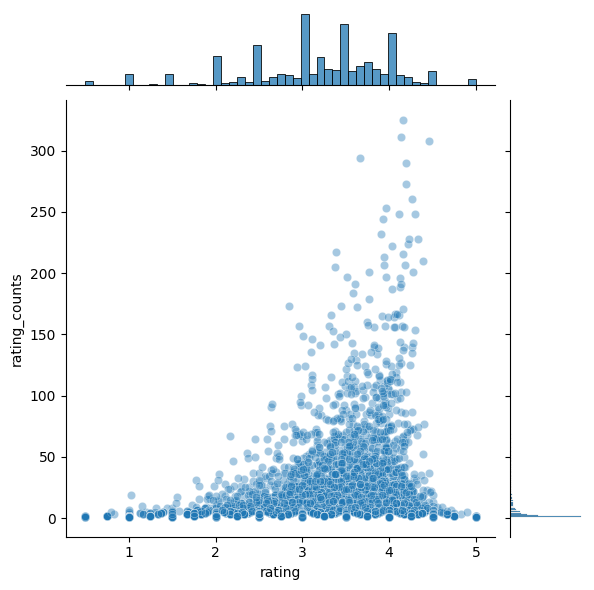

In [12]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

FINDING SIMILARITIES

We will use the correlation between the ratings of a movie as the similarity metric.

To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie.

This matrix will have a lot of null values since every movie is not rated by every user.

In [13]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')


We know that each column contains all the user ratings for a particular movie.
Now, let's find all the user ratings for the movie Forrest Gump (1994) and find the movies similar to it.
We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

In [14]:
movie_name = 'Forrest Gump (1994)'
movie_X_ratings = user_movie_rating[movie_name]

We can find the correlation between the user ratings for the Forest Gump (1994) and all the other movies using corrwith() function.

In [15]:
movies_like_movie_X = user_movie_rating.corrwith(movie_X_ratings, method='pearson')

corr_movie_X = pd.DataFrame(movies_like_movie_X, columns=['Correlation'])
corr_movie_X.dropna(inplace=True)


c:\Users\lucap\Documents\Repositories\VSC\RecommenderSystem\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\lucap\Documents\Repositories\VSC\RecommenderSystem\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\lucap\Documents\Repositories\VSC\RecommenderSystem\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\lucap\Documents\Repositories\VSC\RecommenderSystem\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\lucap\Documents\Repositories\VSC\RecommenderSystem\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  

Now, let's sort the movies in descending order of correlation to see highly correlated movies at the top.

In [16]:
corr_movie_X.sort_values('Correlation', ascending=False)

,Correlation
title,
"Young Poisoner's Handbook, The (1995)",1.0
"Invisible, The (2007)",1.0
Young Einstein (1988),1.0
1984 (1956),1.0
187 (One Eight Seven) (1997),1.0
...,...
Broken Embraces (Los abrazos rotos) (2009),-1.0
Brideshead Revisited (2008),-1.0
"Bridge of San Luis Rey, The (2004)",-1.0


From the above output, we can see that the movies that have high correlation with Forrest Gump (1994) are not very well known.
This shows that correlation alone is not a good metric for similarity because there can be a user who watched 'Forest Gump (1994) and only one other movie and rated both of them as 5.
A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings.

In [17]:
corr_movie_X = corr_movie_X.join(ratings_mean_count['rating_counts'])

Now, let's now filter movies correlated to Forest Gump (1994), that have more than 50 ratings.

In [18]:
corr_movie_X[corr_movie_X ['rating_counts']>50].sort_values('Correlation', ascending=False).head(10)

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,311
Happy Gilmore (1996),0.715602,79
12 Angry Men (1957),0.545139,63
As Good as It Gets (1997),0.521448,98
First Knight (1995),0.520438,52
"Hunchback of Notre Dame, The (1996)",0.510794,54
Mr. Holland's Opus (1995),0.500052,91
"Patriot, The (2000)",0.492446,67
Field of Dreams (1989),0.480440,70
